In [140]:
# Import Data Science libraries
import pandas as pd
import numpy as np
from scipy.stats import linregress
# Import Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Import requests
import requests
import json
import time
from pprint import pprint

In [141]:
# Study data files
Countries_AQI_datapath = "AQI and Lat Long of Countries.csv"
continent_mapping_datapath ="Countries by continents.csv"
# Read in the csv
Countries_AQI = pd.read_csv(Countries_AQI_datapath)
continent_mapping_data=pd.read_csv(continent_mapping_datapath)

In [142]:
Countries_AQI.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [143]:
Countries_AQI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [144]:
Countries_AQI_data=Countries_AQI.dropna(subset=["Country"])

In [145]:
Countries_AQI_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16393 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16393 non-null  object 
 2   AQI Value           16393 non-null  int64  
 3   AQI Category        16393 non-null  object 
 4   CO AQI Value        16393 non-null  int64  
 5   CO AQI Category     16393 non-null  object 
 6   Ozone AQI Value     16393 non-null  int64  
 7   Ozone AQI Category  16393 non-null  object 
 8   NO2 AQI Value       16393 non-null  int64  
 9   NO2 AQI Category    16393 non-null  object 
 10  PM2.5 AQI Value     16393 non-null  int64  
 11  PM2.5 AQI Category  16393 non-null  object 
 12  lat                 16393 non-null  float64
 13  lng                 16393 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.9+ MB


In [146]:
# Drop duplicate cities
duplicate_AQI_data = Countries_AQI_data[Countries_AQI_data.duplicated(subset=['City','Country'])]
duplicate_AQI_data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
6,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,26.8941,-82.0513
21,United States of America,Pontiac,77,Moderate,2,Good,22,Good,15,Good,77,Moderate,40.8894,-88.6409
34,United States of America,Dayton,45,Good,1,Good,32,Good,7,Good,45,Good,39.2592,-119.5653
35,United States of America,Dayton,45,Good,1,Good,32,Good,7,Good,45,Good,30.0315,-94.9158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16647,United States of America,Salina,51,Moderate,1,Good,34,Good,1,Good,51,Moderate,43.1023,-76.1768
16672,United States of America,Union,51,Moderate,1,Good,47,Good,2,Good,51,Moderate,42.1258,-76.0329
16673,United States of America,Union,51,Moderate,1,Good,47,Good,2,Good,51,Moderate,38.4399,-90.9927
16685,Colombia,Viterbo,55,Moderate,1,Good,24,Good,0,Good,55,Moderate,5.0667,-75.8833


In [147]:
# Dropping Duplicates
AQI_data_cleaned = Countries_AQI_data.drop_duplicates(subset=["City", "Country"], keep="first")
AQI_data_cleaned

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,16.1005,-88.8074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16689,China,Shaoguan,160,Unhealthy,3,Good,160,Unhealthy,1,Good,79,Moderate,24.8011,113.5927
16690,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285
16691,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,49.0650,18.9219
16693,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,48.7786,2.2906


In [ ]:
# Merge CSVs (Adding Continent to dataset)

In [148]:
continent_mapping_data.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [149]:
continent_mapping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  196 non-null    object
 1   Country    196 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [156]:
AQI_data_cleaned= AQI_data_cleaned.rename(columns={
                                            'AQI Value':'Air_Quality_Value',
                                            'AQI Category':'Air_Quality_Category',
                                            'CO AQI Value':'CO_AQI_Value',
                                            'CO AQI Category':'CO_AQI_Category',
                                            'Ozone AQI Value':'Ozone_AQI_Value',
                                            'Ozone AQI Category':'Ozone_AQI_Category',
                                            'NO2 AQI Value':'NO2_AQI_Value',
                                            'NO2 AQI Category':'NO2_AQI_Category',
                                            'PM2.5 AQI Value':'PM2.5_AQI_Value',
                                            'PM2.5 AQI Category':'PM2.5_AQI_Category',
                                            'lat': 'Latitude',
                                            'lng': 'Longitude'
})

In [157]:
AQI_data_cleaned.head()

,Country,City,Air_Quality_Value,Air_Quality_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category,Latitude,Longitude
0,Russia,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
5,United States,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,16.1005,-88.8074


In [158]:
# Replace missing values in the 'Country' column with 'Unknown'
AQI_data_cleaned['Country'] = AQI_data_cleaned['Country'].fillna('Unknown')
AQI_data_cleaned

,Country,City,Air_Quality_Value,Air_Quality_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category,Latitude,Longitude
0,Russia,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
5,United States,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,16.1005,-88.8074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16689,China,Shaoguan,160,Unhealthy,3,Good,160,Unhealthy,1,Good,79,Moderate,24.8011,113.5927
16690,United States,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285
16691,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,49.0650,18.9219
16693,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,48.7786,2.2906


In [159]:
# Dictionary for standardizing country names
standard_country_names = {
    'United States of America': 'United States',
    'Russian Federation': 'Russia',
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Viet Nam': 'Vietnam',
    'Myanmar':'Burma (Myanmar)',
    'United Republic of Tanzania':'Tanzania',
    'Democratic Republic of the Congo':'Congo',
    'Bolivia(Plurinational State of)':'Bolivia',
    'Venezuela(Bolivarian Republic of)':'Venezuela',
    'Burkina Faso':'Burkina',
    "Côte d'Ivoire" : 'Ivory Coast',
    'Iran (Islamic Republic of)' : 'Iran',
    'Cabo Verde' : 'Cape Verde',
    'Republic of North Macedonia' : 'Macedonia',
    'North Macedonia' : 'Macedonia',
    'Republic of Moldova' : 'Moldova',
    "Lao People's Democratic Republic" : 'Laos',
    'State of Palestine' : 'Palestine',
    'Syrian Arab Republic' : 'Syria',
    'Kingdom of Eswatini' :'Swaziland',
    'Eswatini' :'Swaziland',
    'Republic of Korea':'South Korea',
    'Aruba' : 'Aruba',
    'State of Palestine': 'Palestine',
    'Palestine': 'Palestine'
    # Add more mappings if needed
}
# Apply the mapping to DataFrames to standardize country names
AQI_data_cleaned['Country'] = AQI_data_cleaned['Country'].map(standard_country_names).fillna(AQI_data_cleaned['Country'])

In [160]:
AQI_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13956 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               13956 non-null  object 
 1   City                  13956 non-null  object 
 2   Air_Quality_Value     13956 non-null  int64  
 3   Air_Quality_Category  13956 non-null  object 
 4   CO_AQI_Value          13956 non-null  int64  
 5   CO_AQI_Category       13956 non-null  object 
 6   Ozone_AQI_Value       13956 non-null  int64  
 7   Ozone_AQI_Category    13956 non-null  object 
 8   NO2_AQI_Value         13956 non-null  int64  
 9   NO2_AQI_Category      13956 non-null  object 
 10  PM2.5_AQI_Value       13956 non-null  int64  
 11  PM2.5_AQI_Category    13956 non-null  object 
 12  Latitude              13956 non-null  float64
 13  Longitude             13956 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.6+ MB


In [161]:
cities_continents_merged = AQI_data_cleaned.merge(continent_mapping_data, on='Country', how='left')
cities_continents_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13956 entries, 0 to 13955
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               13956 non-null  object 
 1   City                  13956 non-null  object 
 2   Air_Quality_Value     13956 non-null  int64  
 3   Air_Quality_Category  13956 non-null  object 
 4   CO_AQI_Value          13956 non-null  int64  
 5   CO_AQI_Category       13956 non-null  object 
 6   Ozone_AQI_Value       13956 non-null  int64  
 7   Ozone_AQI_Category    13956 non-null  object 
 8   NO2_AQI_Value         13956 non-null  int64  
 9   NO2_AQI_Category      13956 non-null  object 
 10  PM2.5_AQI_Value       13956 non-null  int64  
 11  PM2.5_AQI_Category    13956 non-null  object 
 12  Latitude              13956 non-null  float64
 13  Longitude             13956 non-null  float64
 14  Continent             13878 non-null  object 
dtypes: float64(2), int6

In [162]:
AQI_data_cleaned.describe()

,Air_Quality_Value,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2.5_AQI_Value,Latitude,Longitude
count,13956.000000,13956.000000,13956.000000,13956.000000,13956.000000,13956.000000,13956.000000
mean,63.216538,1.325093,32.558613,3.518917,59.896389,30.935687,0.842514
std,43.535318,1.985798,23.435088,5.666271,43.629999,23.015090,70.334285
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-159.771000
25%,38.000000,1.000000,21.000000,0.000000,34.000000,17.994225,-71.687850
50%,52.000000,1.000000,30.000000,2.000000,52.000000,39.316700,8.131650
75%,69.000000,1.000000,38.000000,4.000000,69.000000,48.166700,37.799225
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [106]:
AQI_pollutants = AQI_data_cleaned[['Country','City', 'CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']]
AQI_pollutants

,Country,City,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2.5_AQI_Value
0,Russia,Praskoveya,1,36,0,51
1,Brazil,Presidente Dutra,1,5,1,41
3,Italy,Priolo Gargallo,1,39,2,66
4,Poland,Przasnysz,1,34,0,20
5,United States,Punta Gorda,1,14,11,54
...,...,...,...,...,...,...
16689,China,Shaoguan,3,160,1,79
16690,United States,Highland Springs,1,34,5,54
16691,Slovakia,Martin,1,39,1,71
16693,France,Sceaux,1,20,5,50


In [107]:
AQI_pollutants_country=AQI_pollutants.groupby('Country').sum()
AQI_pollutants_country

,City,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2.5_AQI_Value
Country,,,,,
Afghanistan,KabulZaranjTaywarah,1,126,0,259
Albania,GramshElbasanTiranaBeratFierBurrelLibrazhdPesh...,9,383,5,689
Algeria,AdrarAlgiersConstantineTimizart,16,140,103,425
Andorra,Encamp,1,32,0,24
Angola,LubangoLuenaCaluquembeCamacupaOndjivaLobitoMal...,71,487,47,1733
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),MaracaiboCaraballedaPuerto AyacuchoAraureRubio...,67,918,189,4044
Vietnam,HanoiKon TumHo Chi Minh CityCam RanhNha TrangVinh,14,311,12,522
Yemen,IbbAden,2,87,0,237


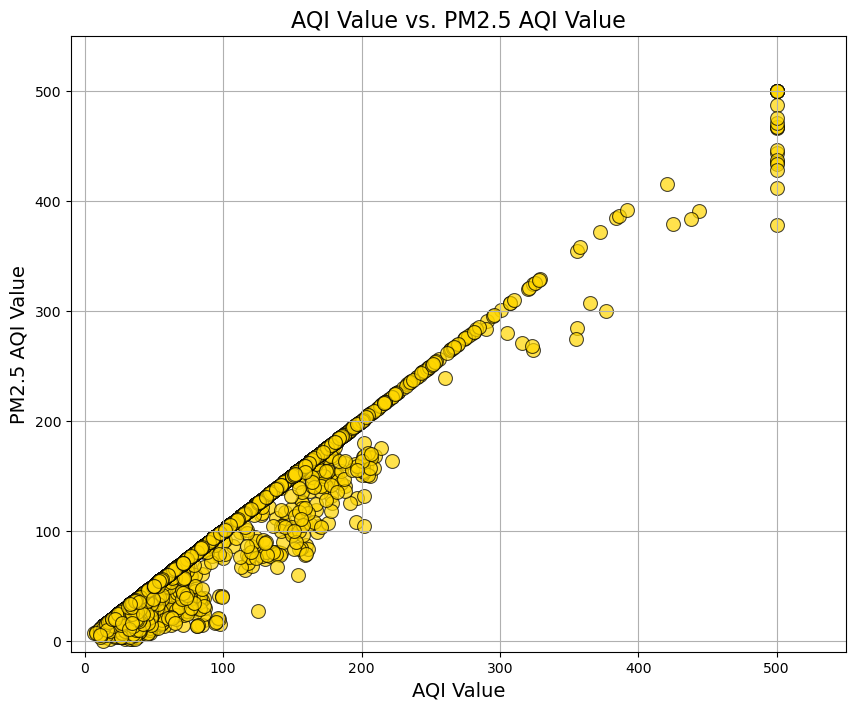

In [217]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=AQI_data_cleaned, x='Air_Quality_Value', y='PM2.5_AQI_Value',color='#FFD700',
                s=100, edgecolor='black', alpha=0.7)

plt.xlim(-10,550)
plt.ylim(-10,550)

# Customize the plot with title, labels, and grid
plt.title('AQI Value vs. PM2.5 AQI Value', fontsize=16)

plt.xlabel('AQI Value', fontsize=14)
plt.ylabel('PM2.5 AQI Value', fontsize=14)

plt.grid(True)

# Display the plot

plt.show()

The correlation between Air Quality Value and PM2.5 AQI Value is 0.98


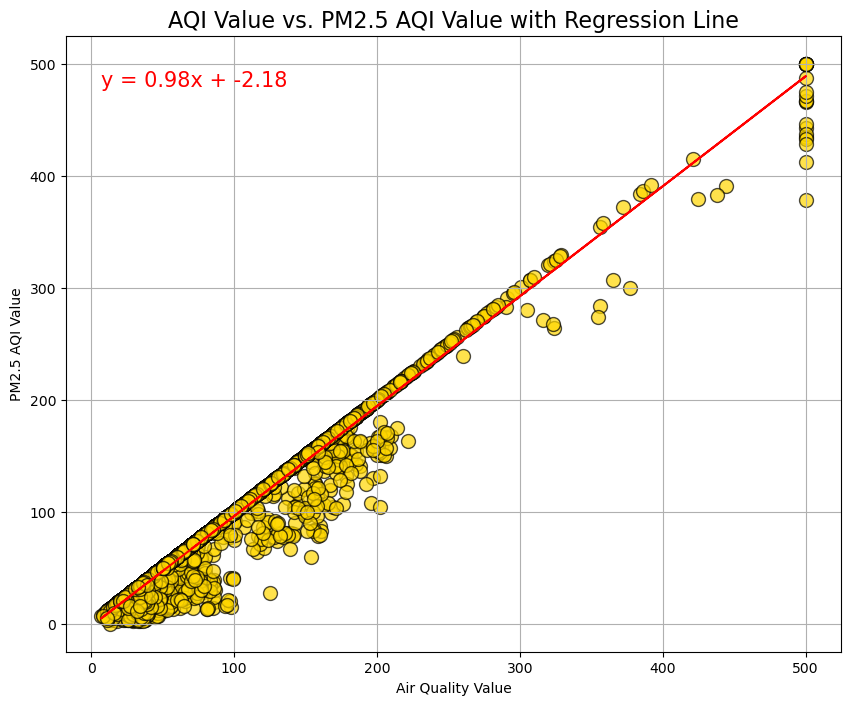

y = 0.98x + -2.18


In [220]:

Air_Quality_Value = AQI_data_cleaned['Air_Quality_Value']
PM25_AQI_Value = AQI_data_cleaned['PM2.5_AQI_Value']

# Pearson correlation
correlation = st.pearsonr(Air_Quality_Value, PM25_AQI_Value)
print(f"The correlation between Air Quality Value and PM2.5 AQI Value is {correlation[0]:.2f}")

# Scatter plot
plt.figure(figsize=(10,8))
#plt.scatter(Air_Quality_Value, PM25_AQI_Value,color='#FFD700')
plt.scatter(Air_Quality_Value, PM25_AQI_Value, alpha=0.7, color='#FFD700',edgecolor='black', s=100)

plt.xlabel('Air Quality Value')
plt.ylabel('PM2.5 AQI Value')

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Air_Quality_Value, PM25_AQI_Value)

# Regression values
regress_values = Air_Quality_Value * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Display the regression line and equation
plt.plot(Air_Quality_Value, regress_values, "r-")
plt.annotate(line_eq, (min(Air_Quality_Value), max(PM25_AQI_Value) - 20), fontsize=15, color="red")

# Display grid, title, and legend
plt.grid(True)
plt.title('AQI Value vs. PM2.5 AQI Value with Regression Line', fontsize=16)


# Show the plot
plt.show()

# Print the regression equation
print(line_eq)

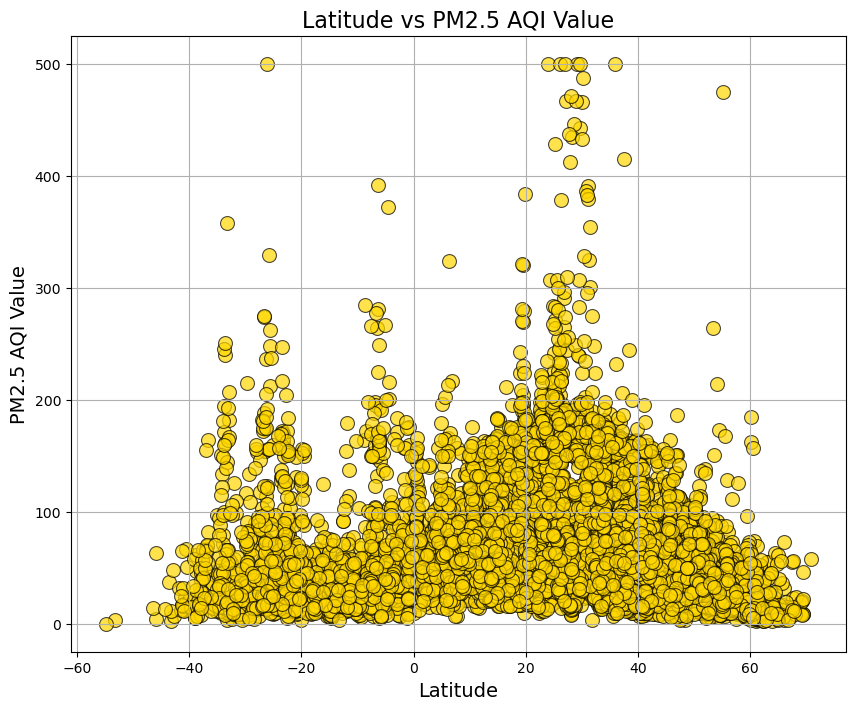

In [236]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=AQI_data_cleaned, x='Latitude', y='PM2.5_AQI_Value', 
                 color='#FFD700',s=100, edgecolor='black', alpha=0.7)

#plt.xlim(-60,100)
#plt.ylim(0,120)

# Customize the plot with title, labels, and grid
plt.title('Latitude vs PM2.5 AQI Value', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('PM2.5 AQI Value', fontsize=14)
plt.grid(True)

# Display the plot


plt.show()

The correlation between Latitude and PM2.5 AQI Value is -0.14


C:\Users\mmish\AppData\Local\Temp\ipykernel_9736\830832290.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


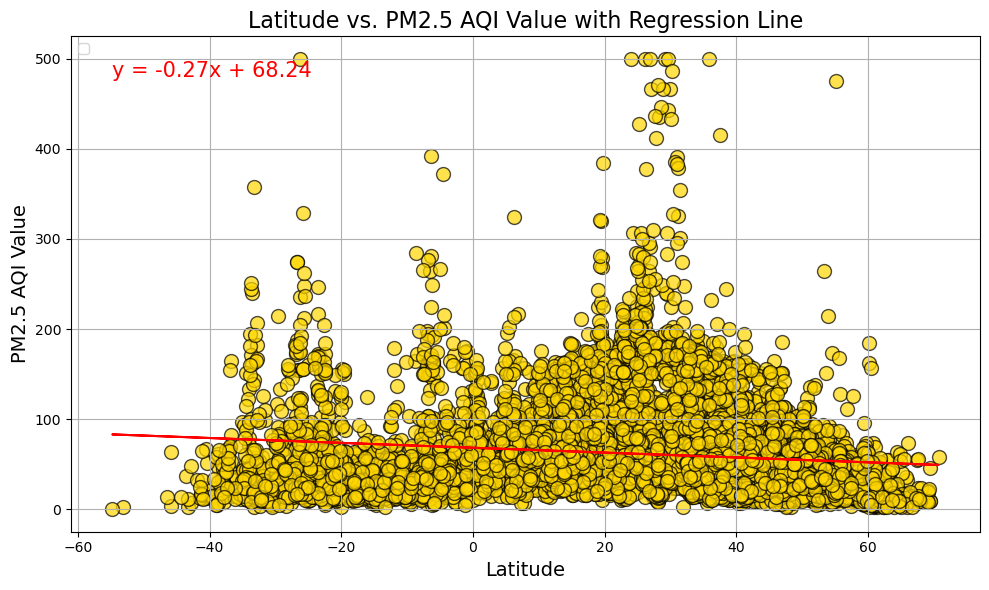

Regression equation: y = -0.27x + 68.24


In [221]:
# Extract the relevant columns
Latitude = AQI_data_cleaned['Latitude']
PM25_AQI_Value = AQI_data_cleaned['PM2.5_AQI_Value']

# Pearson correlation
correlation = st.pearsonr(Latitude, PM25_AQI_Value)
print(f"The correlation between Latitude and PM2.5 AQI Value is {correlation[0]:.2f}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Latitude, PM25_AQI_Value, alpha=0.7, color='#FFD700',edgecolor='black', s=100)



# Labels
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('PM2.5 AQI Value', fontsize=14)

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Latitude, PM25_AQI_Value)

# Regression values (predicted y-values)
regress_values = Latitude * slope + intercept

# Equation of the line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Display the regression line and equation
plt.plot(Latitude, regress_values, "r-")#, label=f'Regression line: {line_eq}')

# Annotate the regression equation on the plot
plt.annotate(line_eq, 
             (min(Latitude), max(PM25_AQI_Value) - 20), 
             fontsize=15, color="red")

# Display grid, title, and legend
plt.grid(True)
plt.title('Latitude vs. PM2.5 AQI Value with Regression Line', fontsize=16)
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
# Print the regression equation
print(f"Regression equation: {line_eq}")

C:\Users\mmish\AppData\Local\Temp\ipykernel_9736\215195289.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='AQI Category', loc='upper right')


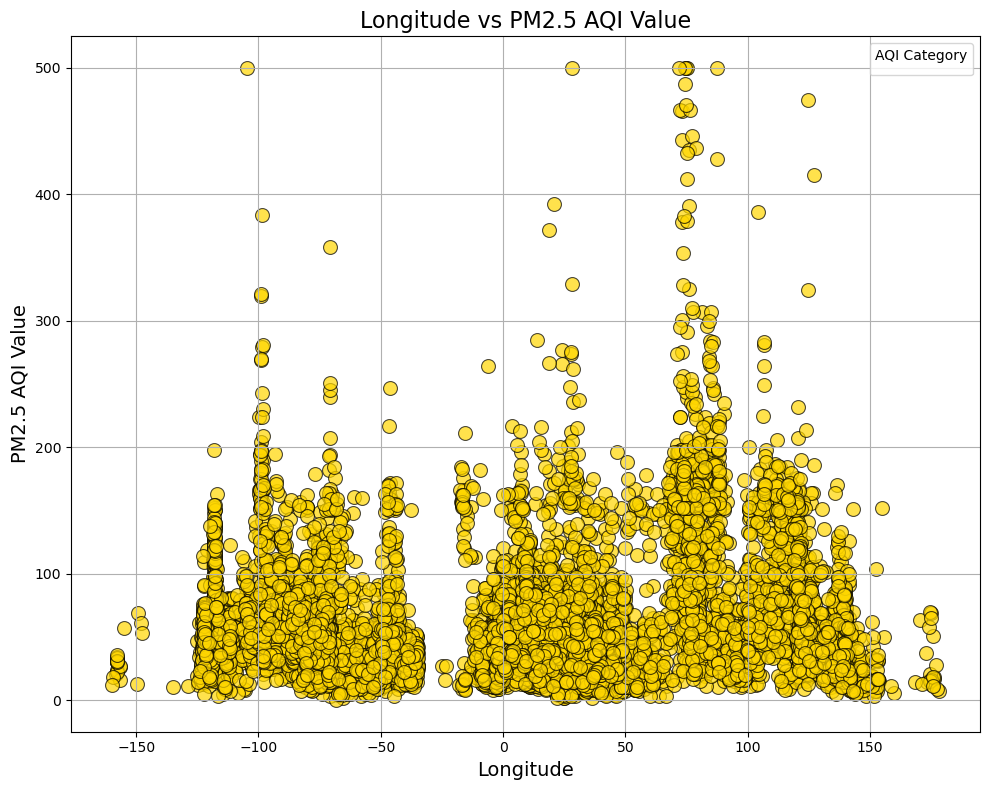

In [222]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=AQI_data_cleaned, x='Longitude', y='PM2.5_AQI_Value', 
                 color='#FFD700',s=100, edgecolor='black', alpha=0.7)

#plt.xlim(-60,100)
#plt.ylim(0,120)

# Customize the plot with title, labels, and grid
plt.title('Longitude vs PM2.5 AQI Value', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('PM2.5 AQI Value', fontsize=14)
plt.grid(True)

# Display the plot
plt.legend(title='AQI Category', loc='upper right')
plt.tight_layout()
plt.show()

The correlation between Latitude and PM2.5 AQI Value is 0.12


C:\Users\mmish\AppData\Local\Temp\ipykernel_9736\3266037331.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')
C:\Users\mmish\AppData\Local\Temp\ipykernel_9736\3266037331.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='AQI Category', loc='upper right')


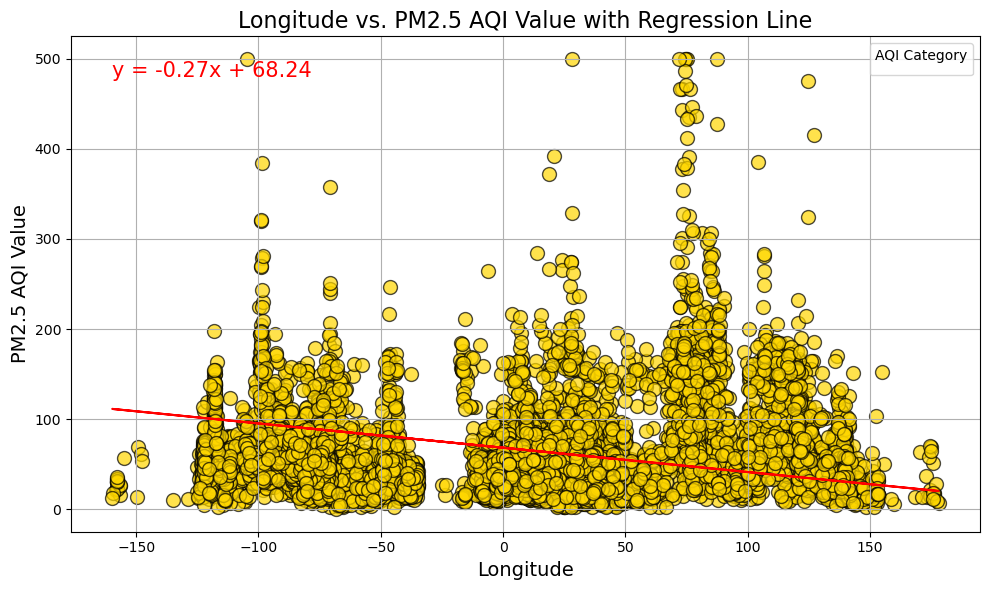

In [223]:
# Extract the relevant columns
Longitude = AQI_data_cleaned['Longitude']
PM25_AQI_Value = AQI_data_cleaned['PM2.5_AQI_Value']

# Pearson correlation
correlation = st.pearsonr(Longitude, PM25_AQI_Value)
print(f"The correlation between Latitude and PM2.5 AQI Value is {correlation[0]:.2f}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Longitude, PM25_AQI_Value, alpha=0.7,color='#FFD700', edgecolor='black', s=100)



# Labels
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('PM2.5 AQI Value', fontsize=14)

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Latitude, PM25_AQI_Value)

# Regression values (predicted y-values)
regress_values = Longitude * slope + intercept

# Equation of the line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Display the regression line and equation
plt.plot(Longitude, regress_values, "r-")#, label=f'Regression line: {line_eq}')

# Annotate the regression equation on the plot
plt.annotate(line_eq, 
             (min(Longitude), max(PM25_AQI_Value) - 20), 
             fontsize=15, color="red")

# Display grid, title, and legend
plt.grid(True)
plt.title('Longitude vs. PM2.5 AQI Value with Regression Line', fontsize=16)
plt.legend(loc='upper left')

# Display the plot
plt.legend(title='AQI Category', loc='upper right')
plt.tight_layout()
plt.show()


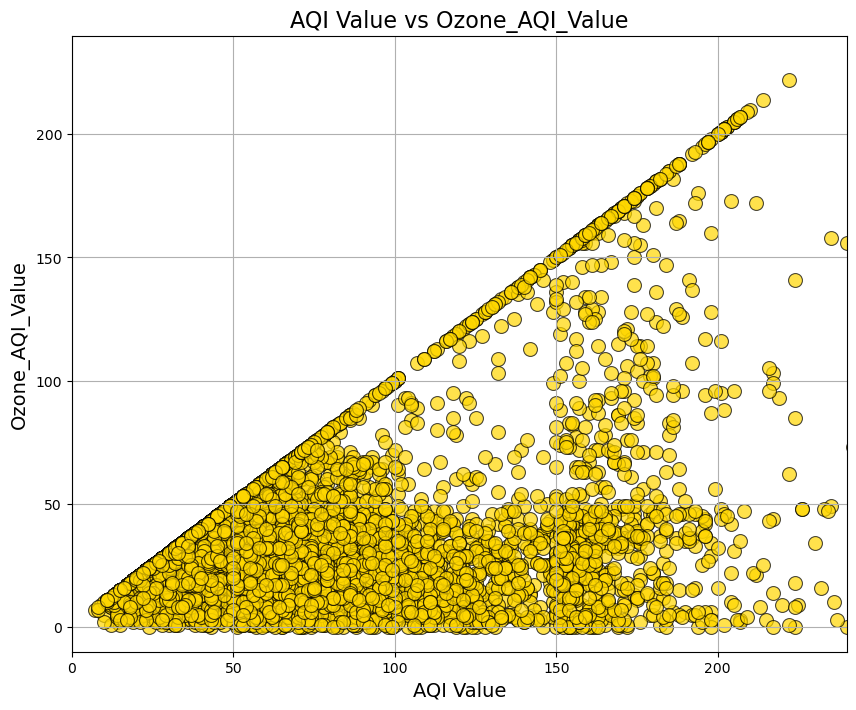

In [229]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=AQI_data_cleaned, x='Air_Quality_Value', y='Ozone_AQI_Value',
                 color='#FFD700',s=100, edgecolor='black', alpha=0.7)

plt.xlim(0,240)
plt.ylim(-10,240)

# Customize the plot with title, labels, and grid
plt.title('AQI Value vs Ozone_AQI_Value', fontsize=16)

plt.xlabel('AQI Value', fontsize=14)
plt.ylabel('Ozone_AQI_Value', fontsize=14)

plt.grid(True)

# Display the plot


plt.show()

The correlation between AQI Value vs. Ozone AQI Value  is 0.35


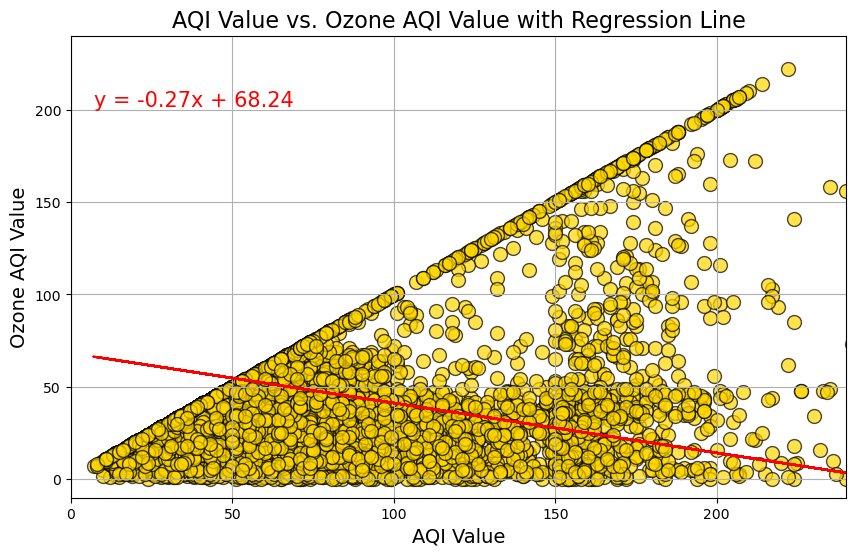

Regression equation: y = -0.27x + 68.24


In [230]:
# Extract the relevant columns
AQIValue = AQI_data_cleaned['Air_Quality_Value']
Ozone_AQI_Value = AQI_data_cleaned['Ozone_AQI_Value']

# Pearson correlation
correlation = st.pearsonr(AQIValue, Ozone_AQI_Value)
print(f"The correlation between AQI Value vs. Ozone AQI Value  is {correlation[0]:.2f}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.xlim(0,240)
plt.ylim(-10,240)
plt.scatter(AQIValue, Ozone_AQI_Value, alpha=0.7, color='#FFD700',edgecolor='black', s=100)



# Labels
plt.xlabel('AQI Value', fontsize=14)
plt.ylabel('Ozone AQI Value', fontsize=14)

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Latitude, PM25_AQI_Value)

# Regression values (predicted y-values)
regress_values =AQIValue * slope + intercept

# Equation of the line
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Display the regression line and equation
plt.plot(AQIValue, regress_values, "r-")#, label=f'Regression line: {line_eq}')

# Annotate the regression equation on the plot
plt.annotate(line_eq, 
             (min(AQIValue), max(Ozone_AQI_Value) - 20), 
             fontsize=15, color="red")

# Display grid, title, and legend
plt.grid(True)
plt.title('AQI Value vs. Ozone AQI Value with Regression Line', fontsize=16)


# Show the plot

plt.show()
# Print the regression equation
print(f"Regression equation: {line_eq}")


In [177]:
cities_continents_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13956 entries, 0 to 13955
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               13956 non-null  object 
 1   City                  13956 non-null  object 
 2   Air_Quality_Value     13956 non-null  int64  
 3   Air_Quality_Category  13956 non-null  object 
 4   CO_AQI_Value          13956 non-null  int64  
 5   CO_AQI_Category       13956 non-null  object 
 6   Ozone_AQI_Value       13956 non-null  int64  
 7   Ozone_AQI_Category    13956 non-null  object 
 8   NO2_AQI_Value         13956 non-null  int64  
 9   NO2_AQI_Category      13956 non-null  object 
 10  PM2.5_AQI_Value       13956 non-null  int64  
 11  PM2.5_AQI_Category    13956 non-null  object 
 12  Latitude              13956 non-null  float64
 13  Longitude             13956 non-null  float64
 14  Continent             13878 non-null  object 
dtypes: float64(2), int6

In [205]:
cities_continents_merged_mean=cities_continents_merged.groupby('Continent').Air_Quality_Value.mean()
cities_continents_merged_mean

Continent
Africa           73.507782
Asia             86.185285
Europe           49.852459
North America    62.623543
Oceania          31.596491
South America    48.579770
Name: Air_Quality_Value, dtype: float64

In [179]:
cities_continents_merged.groupby('Continent').Air_Quality_Value.var()

Continent
Africa           2552.331974
Asia             4343.668573
Europe            308.285984
North America     869.108603
Oceania           805.163173
South America    1314.281697
Name: Air_Quality_Value, dtype: float64

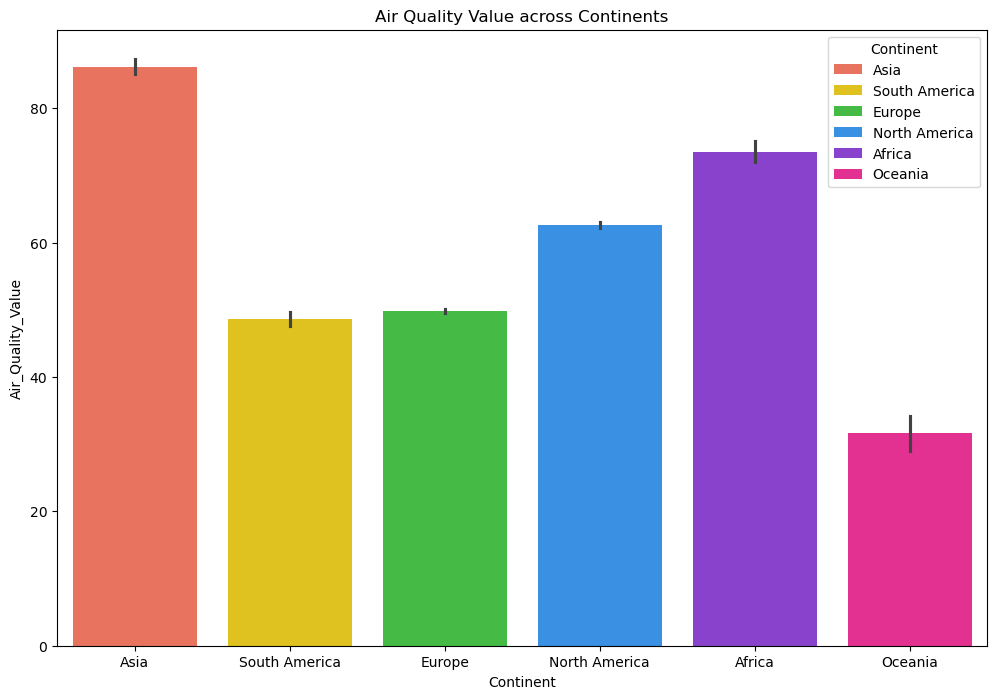

In [237]:
palette = ['#FF6347', '#FFD700', '#32CD32', '#1E90FF', '#8A2BE2', '#FF1493']
plt.figure(figsize=(12, 8))
plt.title("Air Quality Value across Continents")
sns.barplot(cities_continents_merged,x='Continent',y = 'Air_Quality_Value',errorbar="se",palette=palette,hue = 'Continent')
plt.show()

In [182]:
# Difference of Means
Asia = cities_continents_merged.loc[cities_continents_merged.Continent == 'Asia', "Air_Quality_Value"]
Europe = cities_continents_merged.loc[cities_continents_merged.Continent == 'Europe', "Air_Quality_Value"]

st.ttest_ind(Asia, Europe, equal_var=False)

TtestResult(statistic=31.05031627218465, pvalue=4.15014554324163e-188, df=3661.611569440565)

In [200]:
asia_aqi=cities_continents_merged[ cities_continents_merged.Continent == 'Asia']
europe_aqi= cities_continents_merged[cities_continents_merged.Continent == 'Europe']

asia_aqi['Continent']='Asia'
europe_aqi['Continent']='Europe'
asia_europe_aqi=pd.concat([asia_aqi,europe_aqi])


C:\Users\mmish\AppData\Local\Temp\ipykernel_9736\3026236797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_aqi['Continent']='Asia'
C:\Users\mmish\AppData\Local\Temp\ipykernel_9736\3026236797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe_aqi['Continent']='Europe'


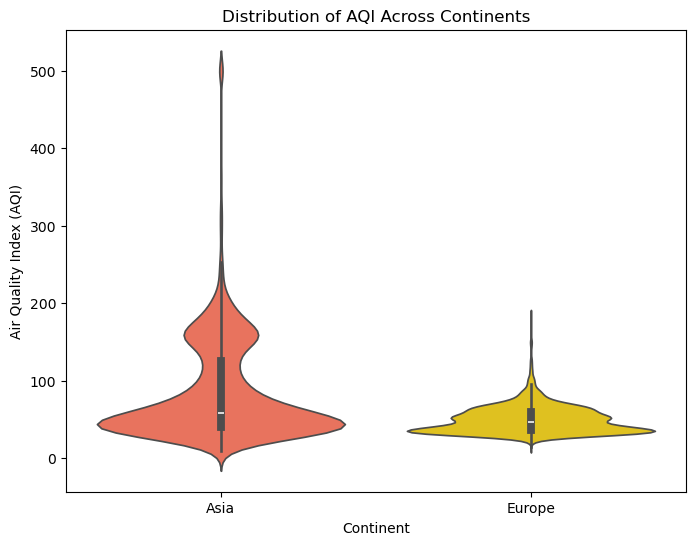

In [233]:
palette = ['#FF6347', '#FFD700']
plt.figure(figsize=(8, 6))
sns.violinplot(asia_europe_aqi,x='Continent',y = 'Air_Quality_Value',hue = 'Continent',palette=palette)
plt.title('Distribution of AQI Across Continents')
plt.xlabel('Continent')
plt.ylabel('Air Quality Index (AQI)')
plt.show()

In [198]:
asia_aqi = cities_continents_merged[cities_continents_merged['Continent'] == 'Asia']['Air_Quality_Value']
europe_aqi = cities_continents_merged[cities_continents_merged['Continent'] == 'Europe']['Air_Quality_Value']
africa_aqi = cities_continents_merged[cities_continents_merged['Continent'] == 'Africa']['Air_Quality_Value']
north_america_aqi = cities_continents_merged[cities_continents_merged['Continent'] == 'North America']['Air_Quality_Value']
south_america_aqi = cities_continents_merged[cities_continents_merged['Continent'] == 'South America']['Air_Quality_Value']
oceania_aqi = cities_continents_merged[cities_continents_merged['Continent'] == 'Oceania']['Air_Quality_Value']
st.f_oneway(asia_aqi, europe_aqi, africa_aqi, north_america_aqi, south_america_aqi,oceania_aqi)


F_onewayResult(statistic=369.3766024923413, pvalue=0.0)

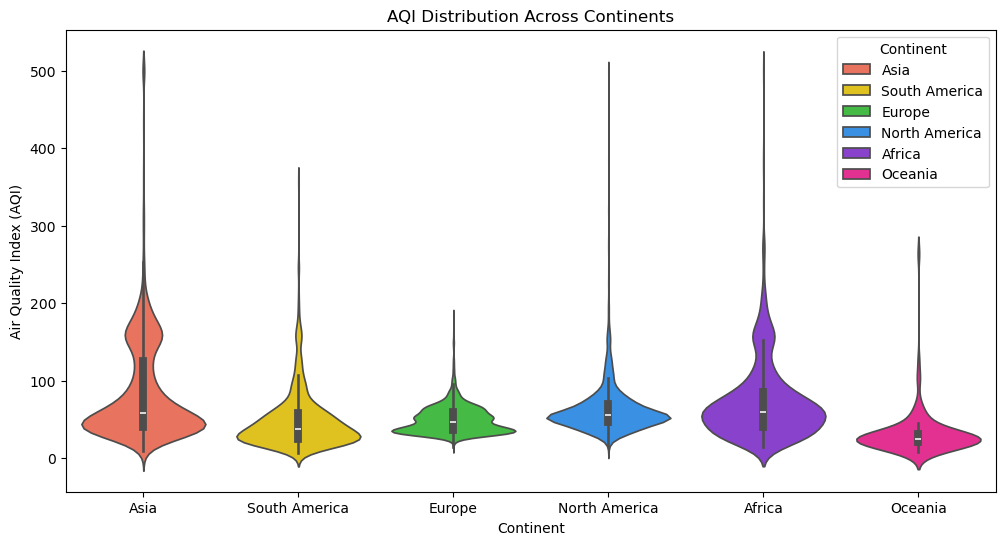

In [231]:
# Defining  custom color palette (6 colors for 6 continents)
palette = ['#FF6347', '#FFD700', '#32CD32', '#1E90FF', '#8A2BE2', '#FF1493']


plt.figure(figsize=(12, 6))
sns.violinplot(x='Continent', y='Air_Quality_Value', data=cities_continents_merged, hue='Continent', palette=palette)
plt.title('AQI Distribution Across Continents')
plt.xlabel('Continent')
plt.ylabel('Air Quality Index (AQI)')
plt.show()